# Принятие решений в бизнесе

## Описание проекта

Вы — aналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## Цель проекта

Приоритезровать гипотезы и проанализировать результаты A/B-теста

## Задачи

### Часть 1. Приоритезация гипотез

- [x] Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- [x] Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- [x] Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить результаты.

### Часть 2. Анализ A/B-теста

- [x] Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- [x] Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- [x] Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- [x] Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- [x] Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- [x] Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- [x] Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберать границу для определения аномальных пользователей.
- [x] Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- [x] Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
- [x] Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- [x] Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- [x] Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- [x] Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- [x] Принять решение по результатам теста и объяснить его. Варианты решений:
    * Остановить тест, зафиксировать победу одной из групп.
    * Остановить тест, зафиксировать отсутствие различий между группами.
    * Продолжить тест.
    
## Описание данных

Файл /datasets/hypothesis.csv <a href="https://code.s3.yandex.net/datasets/hypothesis.csv">(скачать датасет)</a></p>:
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv <a href="https://code.s3.yandex.net/datasets/orders.csv">(скачать датасет)</a></p>:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv <a href="https://code.s3.yandex.net/datasets/visitors.csv">(скачать датасет)</a></p>:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re
import math
import ast
import plotly.express as px
from datetime import datetime, timedelta, date
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [ ]:
sns.set_style('darkgrid')
pd.set_option('display.max_colwidth', False)

In [ ]:
try: 
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

## Приоритезация гипотез

In [ ]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Фреймворк ICE

In [ ]:
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'],2)
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Фреймворк RICE

In [ ]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Результаты приоретизации

В приоритезации гипотез фрейморков ICE первые четыре места заняли гипотезы под порядковыми номерами: 8, 0, 7, 6  
В приоритезации гипотез фрейморков RICE первые четыре места занили гипотезы под порядковыми номерами: 7, 2, 0, 6

* Гипотеза под номерам 7 после применения фреймворка RICE заняла первое место, так как у нее максимальное значение влияние на пользователей (охват), в то время как у гипотезы под номеров 8 Охват равен 1.  
* Второе место заняла гипотеза под номером 2, у нее также высокий балл влияние на пользователей.  
* Неизменным на четвертой позиции осталась гипотеза под номером 6

## Анализ A/B-теста

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
# Определим пользователей которые попали и в сегмент А и в сегмент В

doubles = set(orders.query('group=="A"')['visitorId'].unique()).intersection(orders.query('group=="B"')['visitorId'].unique())

In [ ]:
# Исключим пользователей, которые попали и в сегмент А и в сегмент В из теста

orders = orders[~orders['visitorId'].isin(doubles)]

In [ ]:
# корректировка заголовков
orders.columns = [
    'order_id',
    'user_id',
    'date',
    'revenue',
    'group'
]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  1016 non-null   int64 
 1   user_id   1016 non-null   int64 
 2   date      1016 non-null   object
 3   revenue   1016 non-null   int64 
 4   group     1016 non-null   object
dtypes: int64(3), object(2)
memory usage: 47.6+ KB


In [ ]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

In [ ]:
# проверка на наличие пропусков
datesGroups.isna().sum()

date     0
group    0
dtype: int64

### График кумулятивной выручки по группам

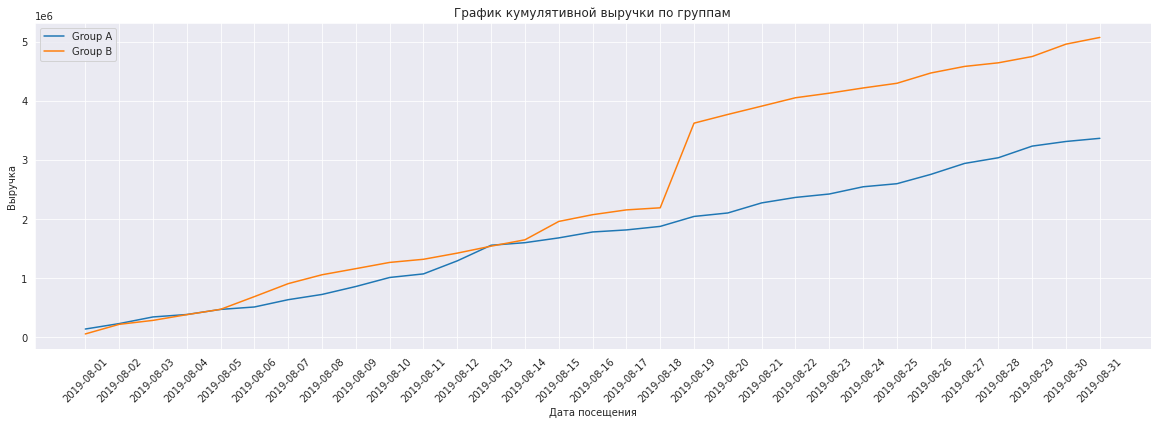

In [ ]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'order_id': 'nunique',
            'user_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(20,6))
plt.title("График кумулятивной выручки по группам")
plt.xlabel("Дата посещения")
plt.ylabel("Выручка")
plt.xticks(rotation=45)
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend(['Group A', 'Group B']) 

<b>Наблюдения:</b>

До середины теста значения между группами были относительно равны, но ближе к середине теста сегмент B вырвался вперед. Послее 2019-08-18 в данных видны явные аномалии

### График кумулятивного среднего чека по группам

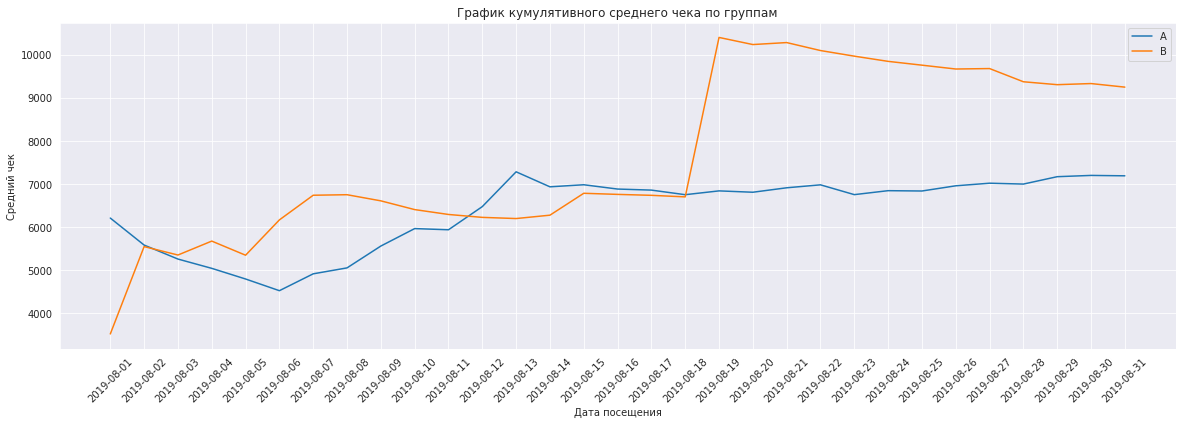

In [ ]:
plt.figure(figsize=(20,6))
plt.title("График кумулятивного среднего чека по группам")
plt.xlabel("Дата посещения")
plt.ylabel("Средний чек")
plt.xticks(rotation=45)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

<b>Наблюдения:</b>

График среднего чека показывает, что в некоторые момента проведения теста, наблюдались аномальные заказы. В целом динамика среднего чека между сегментами переменчива, в начале проведения теста сегмент А упал, но ближе к середине теста выровнялся с сегментом В. После 2019-08-18 заметен резкий скачек среднего чека в сегменте В, что говорит об аномалии

###  График относительного изменения кумулятивного среднего чека группы B к группе A

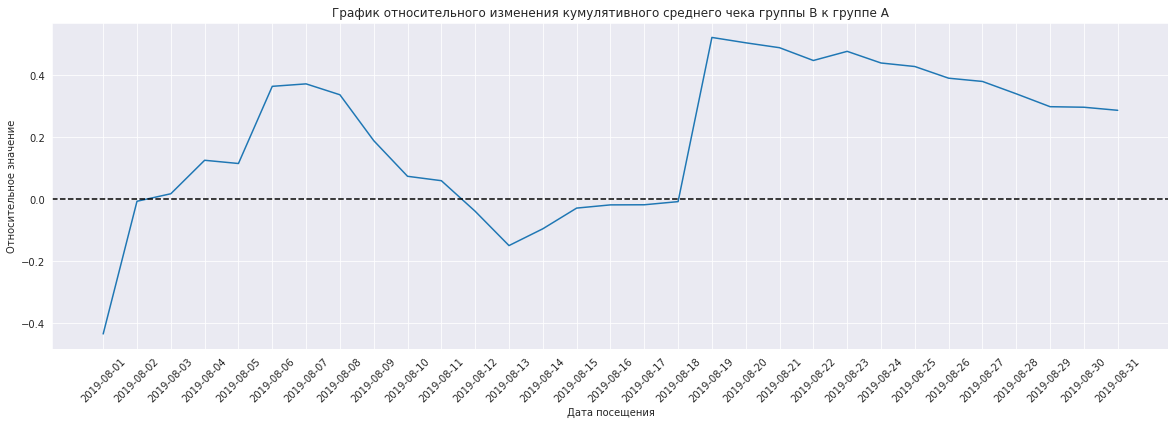

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(20,6))
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel("Дата посещения")
plt.ylabel("Относительное значение")
plt.xticks(rotation=45)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

<b>Наблюдения:</b>

На графике относительного изменения кумулятивного среднего чека видно, что начиная с 2019-08-03 по 2019-08-1 в сегменте B был высокий средний чек. После 2019-08-18 заметен явный аномальный заказ, который привел к резкому ростуу среднего чека в сегменте В.

### График кумулятивного среднего количества заказов на посетителя по группам

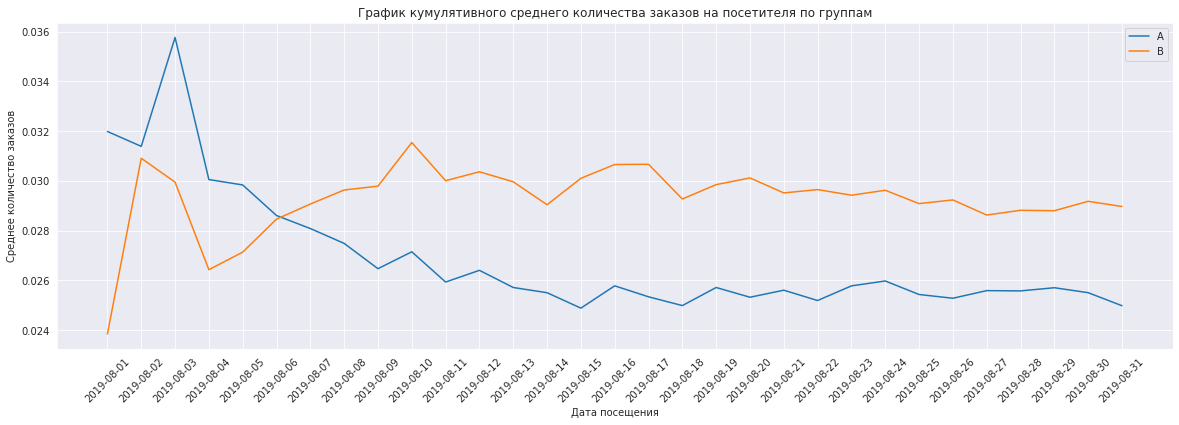

In [ ]:
cumulativeVisitorsA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]
cumulativeVisitorsB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

plt.figure(figsize=(20,6))
plt.title("График кумулятивного среднего количества заказов на посетителя по группам")
plt.xlabel("Дата посещения")
plt.ylabel("Среднее количество заказов")
plt.xticks(rotation=45)
plt.plot(cumulativeVisitorsA['date'], cumulativeVisitorsA['orders']/cumulativeVisitorsA['visitors'], label='A')
plt.plot(cumulativeVisitorsB['date'], cumulativeVisitorsB['orders']/cumulativeVisitorsB['visitors'], label='B')
plt.legend() 

<b>Наблюдения:</b>

Из графика кумулятивного среднего количества заказов на посетителя по группам видно, в сегменте В количество заказов больше, начиная с 2019-08-06 и до конца проведениия теста

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

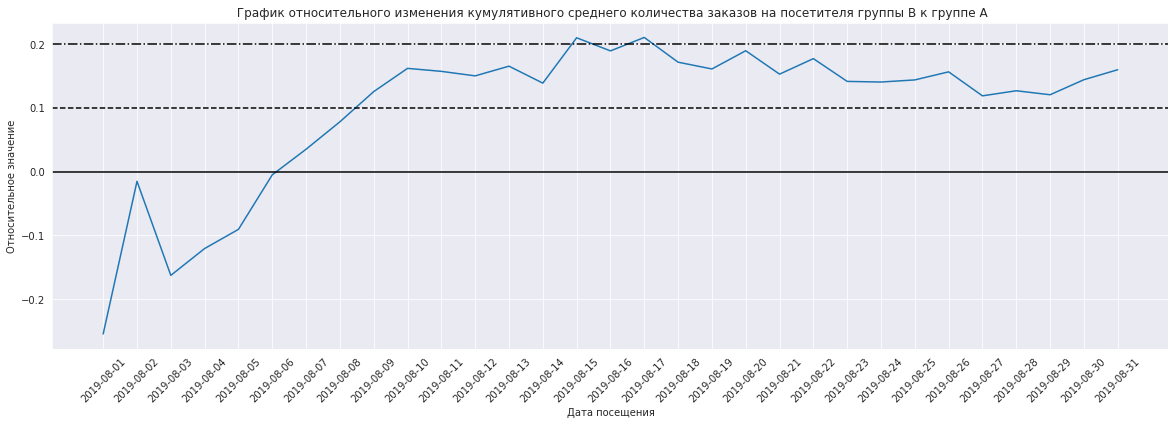

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeVisitors = cumulativeVisitorsA.merge(cumulativeVisitorsB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(20,6))
plt.title(" График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.xlabel("Дата посещения")
plt.ylabel("Относительное значение")
plt.xticks(rotation=45)
plt.plot(mergedCumulativeVisitors['date'], (mergedCumulativeVisitors['ordersB']/mergedCumulativeVisitors['visitorsB'])/(mergedCumulativeVisitors['ordersA']/mergedCumulativeVisitors['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=0.1, color='black', linestyle='--')
plt.axhline(y=0.2, color='black', linestyle='-.')

<b>Наблюдения:</b>

На графике относительно изменения кумулятивного среднего чека видно, подтвердждается прирост средного количества заказов на посетителя в сегменте В. При этом прирост зафиксировался к концу теста на уровне 0.15

### Точечный график количества заказов по пользователям

In [ ]:
ordersByUsers = (
    orders.groupby('user_id', as_index=False)
    .agg({'order_id': 'nunique'})
)
ordersByUsers.columns = ['user_id', 'orders']

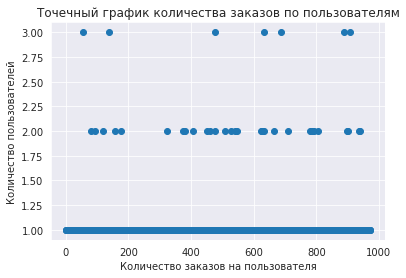

In [ ]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.title("Точечный график количества заказов по пользователям")
plt.xlabel("Количество заказов на пользователя")
plt.ylabel("Количество пользователей")
plt.scatter(x_values, ordersByUsers['orders']) 

<b>Наблюдения:</b>

Посетителей, сделавших более 2 заказов, очень мало. 

###  95-й и 99-й перцентили количества заказов на пользователя

In [ ]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 1. 2.]


<b>Наблюдения:</b>

Не более 1% посетителей делали 2 заказа. Нижняя граница числа заказов равна 2.

###  Точечный график стоимостей заказов

In [ ]:
ordersByRevenue = (
    orders.groupby('order_id', as_index=False)
    .agg({'revenue': 'sum'})
)
ordersByRevenue.columns = ['order_id', 'revenue']

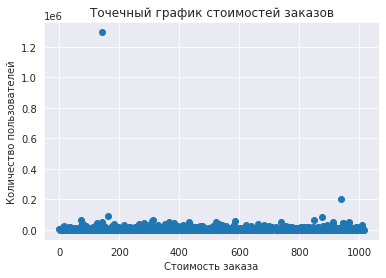

In [ ]:
x_values = pd.Series(range(0, len(ordersByRevenue)))
plt.title("Точечный график стоимостей заказов")
plt.xlabel("Стоимость заказа")
plt.ylabel("Количество пользователей")
plt.scatter(x_values, ordersByRevenue['revenue']) 

<b>Наблюдения:</b>

Заказов, чья стомость более 50000 существенно меньше

###  95-й и 99-й перцентили стоимости заказов

In [ ]:
print(np.percentile(ordersByRevenue['revenue'], [90, 95, 99])) 

[17990. 26785. 53904.]


<b>Наблюдения:</b>

Не более 10% заказов имеют стоимость выше 17990, из них 5% заказов стоимостью более 26785 и всего 1% заказов стомостью выше 53904. Нижняя граниа стоимости заказов равна 26785

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

<b>Гипотезы:</b>

* *Нулевая:* различий в среднем количестве заказов между группами нет. 
* *Альтернативная:* различия в среднем между группами есть.

Значение *alpha* будем учитывать равную 5% (0.05). В качество метода проверки гипотез будем применять статистический критерий *Манна-Уитни*

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.01102
Относительное различие: 0.160


<b>Наблюдения:</b>

P-value меньше 0.05, потому гипотеза о том, что различий в среднем количестве заказов между группами нет, нулевая гипотеза,  отвергается.  
В среднем количестве заказов на посетителя между группами есть статистически значимые различия. Относительный прирост среднего сегмента В составил 16%

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

<b>Гипотезы:</b>

* *Нулевая:* различий в среднем чеке заказа между группами нет. 
* *Альтернативная:* различия в среднем чеке заказа между группами есть.

Значение *alpha* будем учитывать равную 5% (0.05). В качество метода проверки гипотез будем применять статистический критерий *Манна-Уитни*

In [ ]:
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Относительное различие: 0.287


<b>Наблюдения:</b>

P-value больше 0.05, потому гипотеза о том, что различий в среднем чеке заказов между группами нет, нулевая гипотеза, отвергается. То есть, средний чек группы B равен среднему чеку группы A (или не отличается).  
В среднем количестве заказов на посетителя между группами наблюдаемое различие не значимо, получено случайно из-за единичных выбросов. Относительный прирост среднего чека сегмента В составил 28.7%

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(ordersByRevenue['revenue'], [95]))]['user_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('P-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.01593
Относительное различие: 0.174


<b>Наблюдения:</b>

Результаты по итогам "очистки" данных не особо отличаются.

###  Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [ ]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['user_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['user_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['user_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['user_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.727
Относительное различие: -0.034


<b>Наблюдения:</b>

По итогам очистки данных, P-value уменьшился, но остался высоким, больше 0.05.  
Разница между сегментами сократилась на 20%.

### Решение по результатам теста 

Итоги наблюдений:

* Есть статистически значимые различия по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий. Отвергаем нулевую гипотезу;
* Нет статистически значимого различия по среднему чеку между группами по «сырым» данным и по данным после фильтрации аномалий. Принимаем нулевую гипотезу;
* График различия среднего количества заказов между группами сообщает, что результаты группы B значительно лучше группы A уже после проведеной 1/3 отрезка теста;
* График различия среднего чека говорит о том, что результаты группы B сильно улучшились после середины теста из-за влияния аномалий, при очистке данных, данный тренд не наблюдается;

<b>Итог:</b>

Остановить тест, зафиксировать отсутствие различий между группами.  
Не смотря на то, что среднее количество заказов увеличилось на 16%, значимых различий по среднему чеку между группами не наблюдается.